In [5]:
import pathlib
import numpy as np
import healpy as hp
import skyproj
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import astropy.coordinates
from astropy import units as u
from scipy import stats
import pandas as pd
import galstreams #contains stream data
%matplotlib inline

CURRENT_DIR = pathlib.Path.cwd().resolve()
DATA_DIR = CURRENT_DIR.parent / 'data'

In [6]:
def read_galaxies():
    """ reads list of all galaxies within 10 Mpc 
    (requires nbg.cat--- file with table of galaxies from Karachentsev et al)
      
    Returns
    -------
    nbg : pandas dataframe with table in it
    nbgs : list of skycoords for each galaxy 
    
    Example
    -------
    Plot all the galaxies on a predefined skyproj
    >>>> plot_galaxies(sp)
    """

    import pandas as pd
    #read and process the table
    nbg=pd.read_csv(DATA_DIR / 'nbg.cat',sep="|",usecols=range(1,13))
    ras=[]
    decs=[]
    hms_str = ['h','m','s']
    dms_str = ['d','m','s']
    for i in range(len(nbg)):
        ra_str=nbg['RA J2000  '][i].split(' ')
        dec_str = nbg['DEC J2000'][i].split(' ')
        ras.append("".join(x+y for x,y in zip(ra_str,hms_str)))
        decs.append("".join(x+y for x,y in zip(dec_str,dms_str)))
    nbgs= astropy.coordinates.SkyCoord(ras,decs)

    return nbg, nbgs

In [7]:
nbg, nbgs = read_galaxies()

In [9]:
nbg_all = pd.read_csv(DATA_DIR/'nbgs.csv')

In [10]:
nbg_all

,Name,RAJ2000,DEJ2000,Maj. Diam (arcmin),Bmag,Kmag,HRV (km/s),D (Mpc),Maj. Diam (kpc),inclination,BMag
0,Segue 1,151.763333,16.073611,7.00,16.21,11.98,206.0,0.02,0.05,90.0,-0.7
1,Segue 3,320.379167,19.117222,1.30,15.90,11.43,NaN,0.02,0.01,58.0,-0.6
2,Sag dSph,283.762917,-30.478333,446.68,4.50,-0.20,140.0,0.02,3.08,90.0,-12.7
3,Segue 2,34.816667,20.175278,5.40,16.20,11.36,-39.0,0.03,0.07,39.0,-2.3
4,UMa II,132.875000,63.130000,25.30,14.80,10.35,-116.0,0.03,0.25,80.0,-3.1
...,...,...,...,...,...,...,...,...,...,...,...
863,KUG 1157+315,180.067500,31.225000,0.83,15.05,12.88,617.0,23.20,5.55,62.0,-17.0
864,FGC1497,191.752500,32.651389,1.07,16.80,14.13,519.0,23.40,6.88,84.0,-15.1
865,IC3247,185.808333,28.893889,2.34,15.25,12.12,569.0,24.40,15.84,86.0,-17.3
866,NGC1400,54.878333,-18.688056,3.47,11.92,7.81,569.0,24.50,26.71,36.0,-20.3


In [11]:
ras = nbg_all['RAJ2000'].values*u.deg
decs = nbg_all['DEJ2000'].values*u.deg

In [12]:
nbgs_all = astropy.coordinates.SkyCoord(ras,decs)

In [13]:
nbgs_all[1]

<SkyCoord (ICRS): (ra, dec) in deg
    (320.3791667, 19.11722222)>

In [16]:
nbgs_all[1].ra.hms

hms_tuple(h=np.float64(21.0), m=np.float64(21.0), s=np.float64(31.000008000007426))

In [17]:
nbgs_all[1].dec.dms

dms_tuple(d=np.float64(19.0), m=np.float64(7.0), s=np.float64(1.9999919999949611))

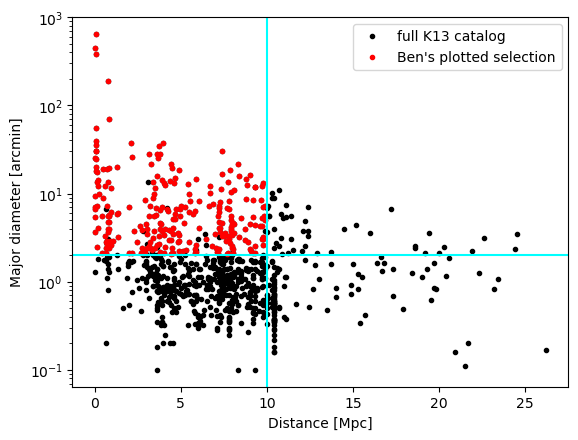

In [40]:
plt.plot(nbg_all['D (Mpc)'],nbg_all['Maj. Diam (arcmin)'],'.k',label = 'full K13 catalog')
plt.plot(nbg[' D (Mpc)'],nbg['Maj_arcmin'],'.r', label = 'Ben\'s plotted selection')
plt.yscale('log')
plt.axhline(2,color='cyan')
plt.axvline(10,color='cyan')
plt.xlabel('Distance [Mpc]')
plt.ylabel('Major diameter [arcmin]')
plt.legend()

In [30]:
galsel = nbg_all['Maj. Diam (arcmin)']>2

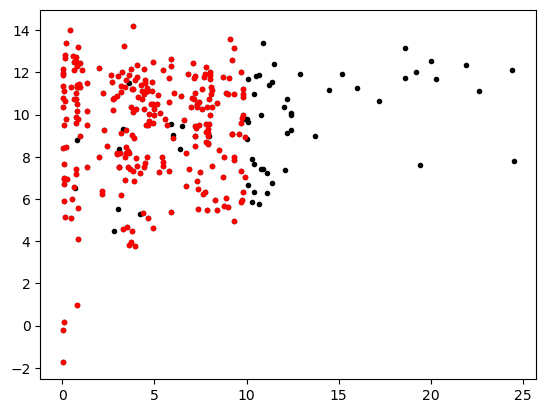

In [34]:
plt.plot(nbg_all['D (Mpc)'][galsel],nbg_all['Kmag'][galsel],'.k')
plt.plot(nbg[' D (Mpc)'],nbg[' Kmag '],'.r')
#plt.yscale('log')
#plt.axhline(2,color='cyan')